# Fraud Detection End - End Project

- Data from Kaggle 
- Exploring Phase Statistical Metrics
- Running Base Line ML Model
- Tunning HyperParameters
- Saving Best Model Pickle File

pip install 
- torch, torchvision, torchaudio: PyTorch and its vision audio utilities
- numpy: Numerical computations
- pandas: used for data handling
- sckit-learn: ml models and preprocessing (X, y)
- matplotlib: Data Visualization
- seaborn: Stats visualiztion
- kaggle: Data source is from 
- kaggleHub: Extract data easily
- fastapi: API framework for backend integration
- uvicorn: ASGI server to run the FastAPI

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [12]:
data = pd.read_csv(r'bank_transactions_data_2.csv')

In [13]:
print("Dataset First Five Rows")
data.head()

Dataset First Five Rows


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [14]:
print("Dataset Information")
data.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

## Understanding the Columns Working with
* Transaction ID: Unique, so each row has a unique ID associated with it alphanumeric style for each transaction - so each row is a transaction
* Account ID: Unique identifier of the account - so each row of transaction can come from multiple associated AccountID
* Transaction Amount: Monetary values of the transaction - I am going to assume this is in $USD pricing since Location looks like U.S.A
* Transaction Date: The Time Stamp of when the transaction was completed or processed?? Format (YY/MM/DD : 24hour )
* Transaction Type: Categorical Type - Transaction can be either Credit or Debit card transaction
* Location: Geographic location of "Cities" - all based in the U.S, so safe to say monetary is in USD
* DeviceID: Alphanumeric identifier for devices used on their platform - so I assume collection of data and can give a unique ID to the Device used - Can we map AccountID to DeviceID??
* IP Address: IPv4 address of the transaction - what information can we gather from this ?? - maybe transactions for this account are usually at this address?? 
* Merchant ID: Unique merchant ID from transaction
* Channel: Categorical value in which the transaction was performed in (ATM, Online... ) - with IPv4 at an ATM that means the DeviceID is associated with. Can we see which DeviceType had the most transaction?? Which location?? 
* Customer Age: The age of the customer from the account - what age group uses more online resources than in person ATM??
* Customer Occupation: Categorical value - Can we see which occupation has the most transactions in a month, year, day??
* Transaction Duration: Duration of the transaction in seconds - need to convert to minute value. - Faster to make transactions online or atm?? How much money is being processed by time??
* Account Balance: Post account balance from transaction success - can we see a relationship of account balance by profession, age, device type?? more people using the ATM higher balance? which city has the largest amount of professions?? account balance??
* Previous Transaction Date: When was the last transaction date - Can we calculate transaction flows more frequent by city, people with higher balance make more purchases?? 

## Exploring Data Further
* Let's explore each column further into detail

In [15]:
print("Statistical Summary")
data.describe()

Statistical Summary


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


-- Data only contains 2,512 rows of data (snapshot)
* Transaction Amount: standard deviation from the mean is $291, max amount money is at $1,919, with 25% of transaction amount $81
* Customer Age: Mean age of customer's in this dataset is 44 years of age, standard deviation form the mean of 17 years of age, max age is 80 years old
* Transaction Duration: 119 seconds - close to 2 minutes and min transaction time less than 10 seconds?? standard deviation from the mean is around 1 minute 9 seconds
* Login Attempts: Takes 1 attempt on average - max being 5 attempts - more attempts on devices or ATM??
* Account Balance: Mean on average for the balance is $5,000 dollars with max of $15,000 dollars. Standard deviation from the mean of $4,000 dollars


## Feature Engineering
* Extracting 'Year', 'Month', 'Day' from 'TransactionDate' and 'PreviousTransactionDate'
* Converting 'TransactionDuration' to minutes
* Checking categorical distributions

In [17]:
# First need to convert  T.D into the correct format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format="%Y-%m-%d %H:%M:%S")
data['PreviousTransactionDate'] = pd.to_datetime(data['TransactionDate'], format="%Y-%m-%d %H:%M:%S")

In [18]:
# Extracting and placing in new columns
data['TransactionYear'] = data["TransactionDate"].dt.year
data['TransactionMonth'] = data["TransactionDate"].dt.month
data['TransactionDay'] = data["TransactionDate"].dt.day
data['TransactionHour'] = data["TransactionDate"].dt.hour



data['PreviousTransactionYear'] = data["PreviousTransactionDate"].dt.year
data['PreviousTransactionMonth'] = data["PreviousTransactionDate"].dt.month
data['PreviousTransactionDay'] = data["PreviousTransactionDate"].dt.day
data['PreviousTransactionHour'] = data["PreviousTransactionDate"].dt.hour

In [24]:
# Convert Transaction Duration from seconds to minutes - no one understands seconds
data["TransactionDurationMinutes"] = data["TransactionDuration"] / 60

# Now drop the old columns
data.drop(columns=['TransactionDate', 'PreviousTransactionDate'], inplace=True)

In [25]:
# After column fixes
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,...,AccountBalance,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,PreviousTransactionYear,PreviousTransactionMonth,PreviousTransactionDay,PreviousTransactionHour,TransactionDurationMinutes
0,TX000001,AC00128,14.09,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,...,5112.21,2023,4,11,16,2023,4,11,16,1.350000
1,TX000002,AC00455,376.24,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,...,13758.91,2023,6,27,16,2023,6,27,16,2.350000
2,TX000003,AC00019,126.29,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,...,1122.35,2023,7,10,18,2023,7,10,18,0.933333
3,TX000004,AC00070,184.50,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,...,8569.06,2023,5,5,16,2023,5,5,16,0.416667
4,TX000005,AC00411,13.45,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,...,7429.40,2023,10,16,17,2023,10,16,17,3.300000


## Boxplot for Outliers and Distribution Analysis
* Visualize  `Transaction Amount`, `Account Balance`, `Transaction Duration`
* Wanting to detect any outliers

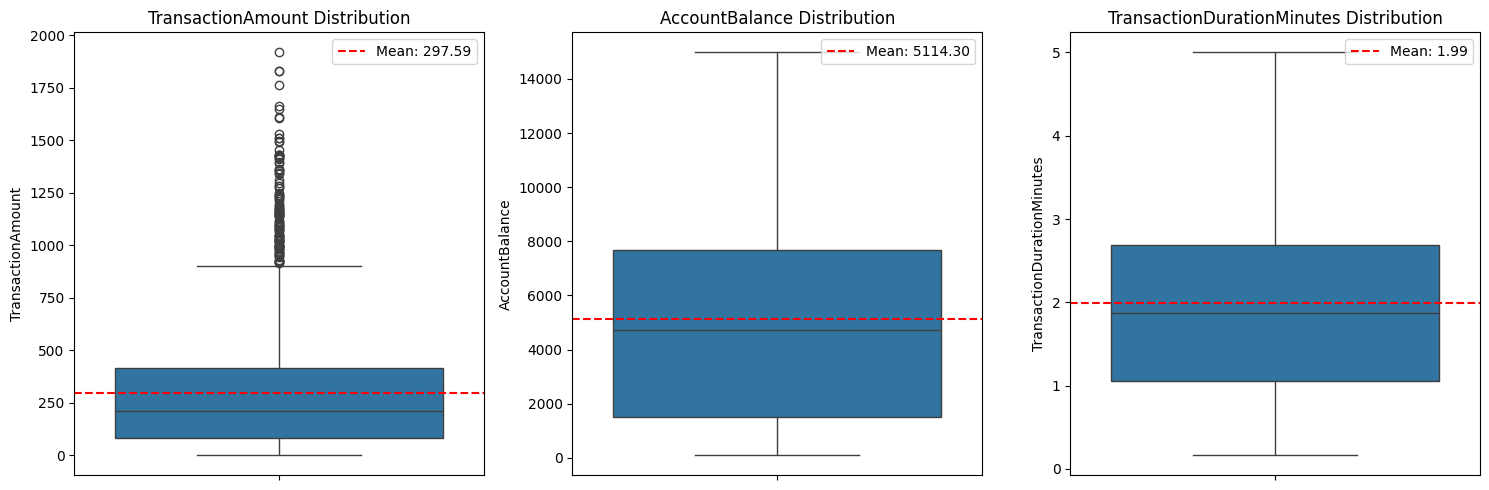

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_cols = ["TransactionAmount", "AccountBalance", "TransactionDurationMinutes"]


plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)  


    sns.boxplot(y=data[col])
    

    mean_value = data[col].mean()


    plt.axhline(y=mean_value, color="r", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_value:.2f}")


    plt.title(f"{col} Distribution")


    plt.legend()


plt.tight_layout()
plt.show()


In [36]:
temp_data = data[["TransactionAmount","AccountBalance", "TransactionDurationMinutes"]]

temp_data.describe()

,TransactionAmount,AccountBalance,TransactionDurationMinutes
count,2512.000000,2512.000000,2512.000000
mean,297.593778,5114.302966,1.994055
std,291.946243,3900.942499,1.166063
min,0.260000,101.250000,0.166667
25%,81.885000,1504.370000,1.050000
50%,211.140000,4735.510000,1.875000
75%,414.527500,7678.820000,2.683333
max,1919.110000,14977.990000,5.000000


**Discussion**
* The Transaction Amount box plot has lower end of the 1st quartile from $50 to $230 dollars, and upper 3rd quartile form $250 dollars to less than $400. 50% of the data lies around $200.  There are a lot of outliers in the Transaction amount distribution. 
* The Account Balance has a mean of $5,114 dollars with 1st quartile of the balances in the data above closer $7,678 dollars. Lower 3rd quartile closer to $1,504 dollars. More than half the accounts have a balance of $4,735 dollars. 25% of the data above Q3 is above $8,000 dollars and below Q1, 25% of the data is below $1,500 dollars.
* Transaction Duration Minutes has a mean close to 2 minutes. 50% of the data in 1.8 minutes

## Brainstorming Questions to Answer

## Answering those questions